# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


These subplots show for each attribute:
 The boxplot:median, outliers,25 and 75 percentile,largest and smallest value whithing 1.5x interquartile range, and the interquartile range
 The associated histogram: Distribution of the attribute values


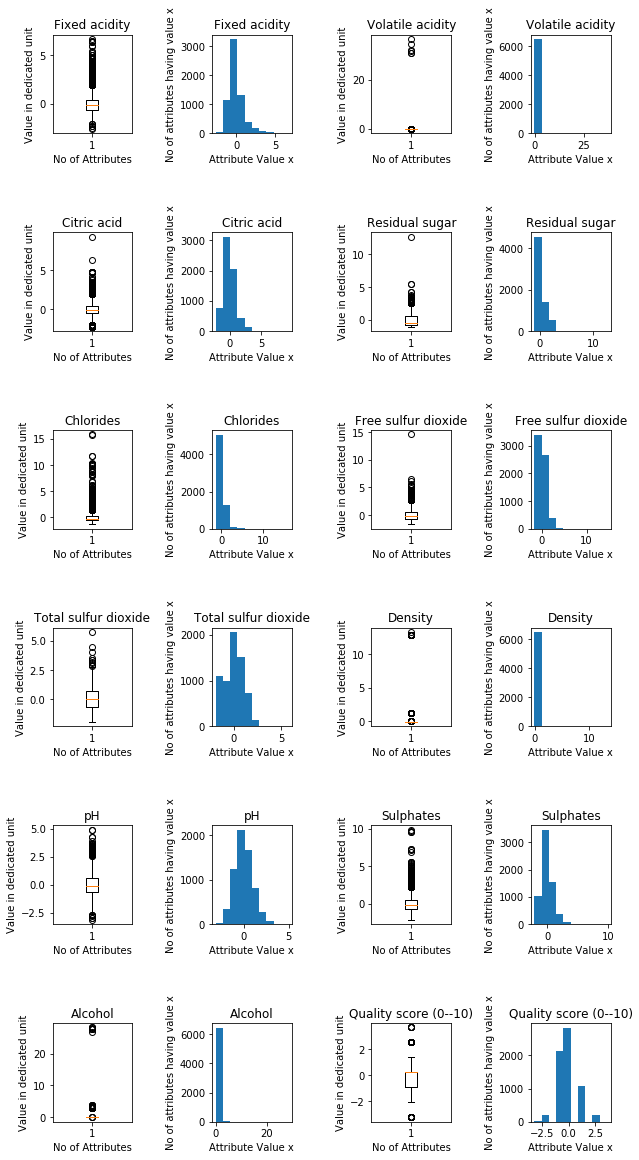

In [2]:
import scipy.io as sio
import statistics
import scipy.stats
import numpy
import matplotlib.pyplot as plt


#-------------------------------------------------------------------------------------------------------------------------------
#Load the data
data = scipy.io.loadmat("C:\\Users\\noric\\Downloads\\Assignment_2\\Assignment_2\\Data\\wine")
#-------------------------------------------------------------------------------------------------------------------------------

#Storred attribute values
data_X = data['X']


#Get attribute names
data_attrNames=[]
for i in range(0,12):
    data_attrNames.append(data['attributeNames'][0][i][0])


#-------------------------------------------------------------------------------------------------------------------------------
#Plot initial data set
print("These subplots show for each attribute:\n The boxplot:median, outliers,25 and 75 percentile,largest and smallest value whithing 1.5x interquartile range, and the interquartile range\n The associated histogram: Distribution of the attribute values")


fig, ax = plt.subplots(6,4,figsize=(10,20))
ax=ax.ravel()
data_to_plot=[]
for i in range(len(data_attrNames)):
    data_to_plot.append(scipy.stats.zscore(data_X[:,i]))
    
x=0
y=1
for i in range(0,len(data_attrNames)):
     
    (ax[x]).boxplot(data_to_plot[i])
    (ax[x]).set_ylabel("Value in dedicated unit")
    (ax[x]).set_xlabel("No of Attributes")
    (ax[x]).set_title(data_attrNames[i])
    
    (ax[y]).hist(data_to_plot[i])
    (ax[y]).set_ylabel("No of attributes having value x")
    (ax[y]).set_xlabel("Attribute Value x")
    (ax[y]).set_title(data_attrNames[i])
    
    x=x+2
    y=x+1
    
fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)
plt.show()
#-------------------------------------------------------------------------------------------------------------------------------









These subplots show for each attribute, after removing outliers as described for some attributes:
 The boxplot:median, outliers,25 and 75 percentile,largest and smallest value whithing 1.5x interquartile range, and the interquartile range
 The associated histogram: Distribution of the attribute values


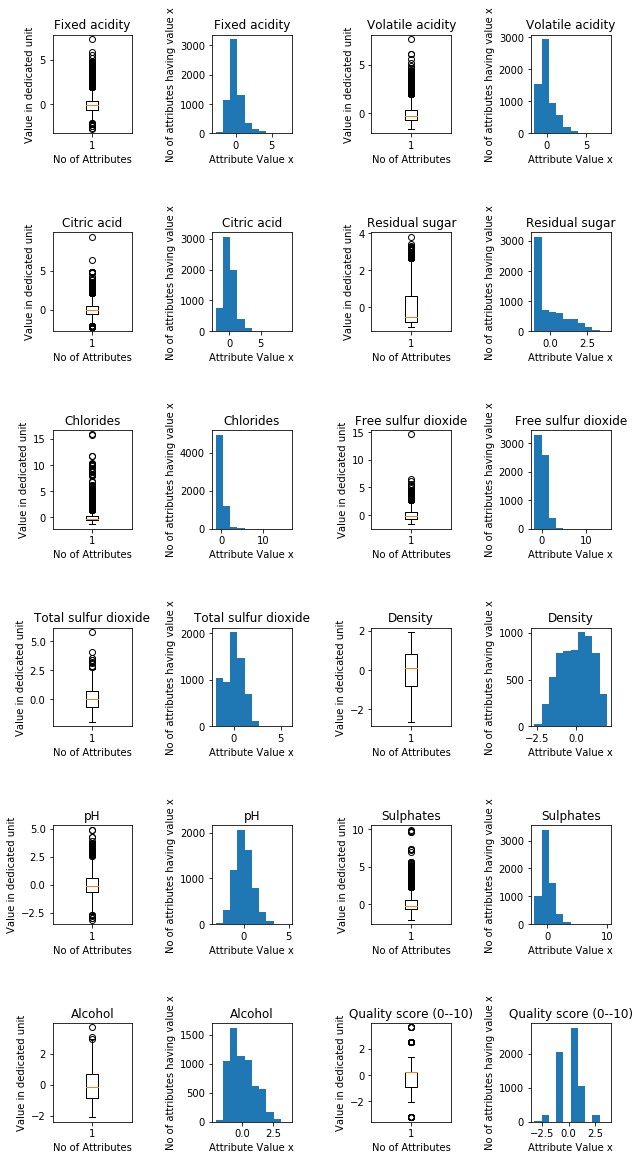

In [3]:

data_X_filtered=[]
for row in (data_X):
    if row[1]>=10*2 or row[7] >=10 or row[10]>=200:
        pass 
    else: data_X_filtered.append(row)

print("These subplots show for each attribute, after removing outliers as described for some attributes:\n The boxplot:median, outliers,25 and 75 percentile,largest and smallest value whithing 1.5x interquartile range, and the interquartile range\n The associated histogram: Distribution of the attribute values")


data_X_filtered=np.array(data_X_filtered)
fig, ax = plt.subplots(6,4,figsize=(10,20))
ax=ax.ravel()
data_to_plot=[]
for i in range(len(data_attrNames)):
    data_to_plot.append(scipy.stats.zscore(data_X_filtered[:,i]))
    
x=0
y=1

data_to_plot=[]
for i in range(len(data_attrNames)):
    data_to_plot.append(scipy.stats.zscore(data_X_filtered[:,i]))
    
for i in range(0,len(data_attrNames)):
     
    (ax[x]).boxplot(data_to_plot[i])
    (ax[x]).set_ylabel("Value in dedicated unit")
    (ax[x]).set_xlabel("No of Attributes")
    (ax[x]).set_title(data_attrNames[i])
    
    (ax[y]).hist(data_to_plot[i])
    (ax[y]).set_ylabel("No of attributes having value x")
    (ax[y]).set_xlabel("Attribute Value x")
    (ax[y]).set_title(data_attrNames[i])
    
    x=x+2
    y=x+1
    
fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)
plt.show()

I see that the distribution of the Volatile acidity, Density , Alchohol are now much closer to a normal distribution. The Desnity has a distribution that looks the most like a normal distribution and we see that there are no outliers on the box-plot. 

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

Why we need to do this in this order:
1. Removing the outliers first before standardizing is important because the outliers influence strongly the mean and the standard deviation (which is calculated using the mean) which are used in the formula for standardization. And it could happen that I have perfectly distributed data and two outliers and the mean would not be in the middle of the data but somewhere else and the zscores would be completly off. So that's why I remove the outliers first and then I standardize.

Why standardize:
1. To rescale the data
1. To get more insight:
    1. When we see a zscore the sign tells us if it's below (-) or abore (+) average 
    1. When we see a zscore its value tells me how many standard deviations apart it is from the mean. 
       Ex. A zcore = 2 tells me that it's 2 standard deviations above the mean 
    1. Units disappear because we standardize the spread as well. 
1. To be able to compare two attribute distributions (for ex) to each other by looking at their box-plot. If you standardized the data then you can use the same distribution to compare those attributes. It's like you use one scale of measurement for all of your data. In this way, you can compare easily two data sets, even if the data sets have different scales.




> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

Figure 0 Shows: Relationship betweenFixed acidity- Quality score
Figure 1 Shows: Relationship betweenVolatile acidity- Quality score
Figure 2 Shows: Relationship betweenCitric acid- Quality score
Figure 3 Shows: Relationship betweenResidual sugar- Quality score
Figure 4 Shows: Relationship betweenChlorides- Quality score
Figure 5 Shows: Relationship betweenFree sulfur dioxide- Quality score
Figure 6 Shows: Relationship betweenTotal sulfur dioxide- Quality score
Figure 7 Shows: Relationship betweenDensity- Quality score
Figure 8 Shows: Relationship betweenpH- Quality score
Figure 9 Shows: Relationship betweenSulphates- Quality score
Figure 10 Shows: Relationship betweenAlcohol- Quality score
Figure 11 Shows: Relationship betweenQuality score (0--10)- Quality score


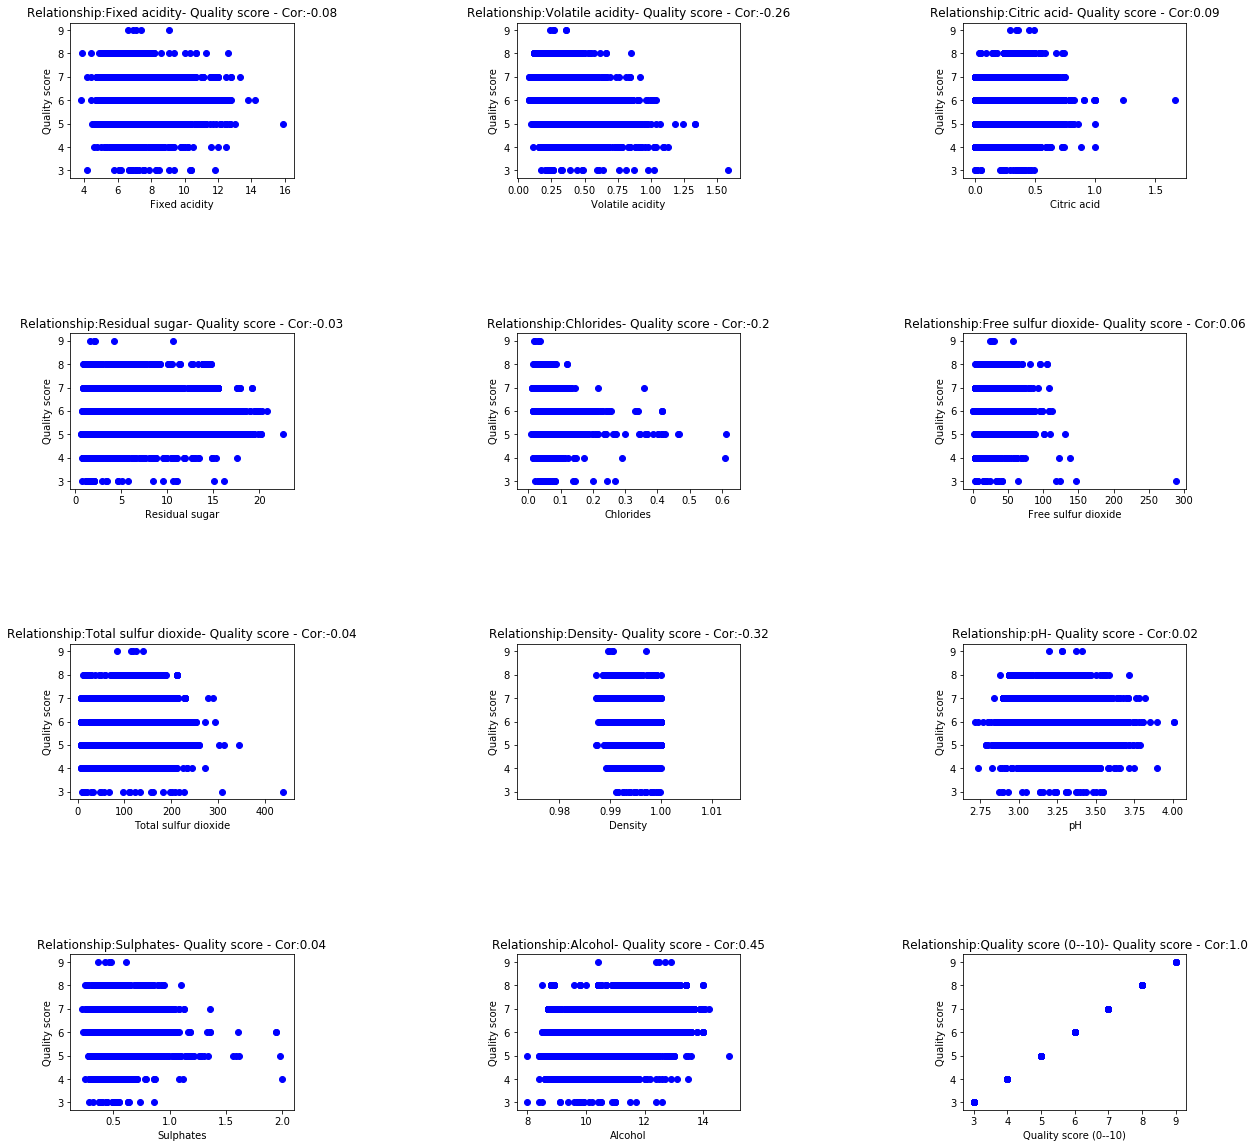

In [14]:
fig, ax = plt.subplots(4,3,figsize=(20,20))
ax=ax.ravel()
fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)

for i in range(12):
    ax[i].scatter(data_X_filtered[:,i],data_X_filtered[:,11],color='b')
    ax[i].set_xlabel(data_attrNames[i])
    ax[i].set_ylabel('Quality score')
    
    (r,p)= scipy.stats.pearsonr(data_X_filtered[:,i],data_X_filtered[:,11])
    
    ax[i].set_title("Relationship:"+ data_attrNames[i] +"- Quality score - " + "Cor:"+str(round(r,2)))
    print("Figure "+str(i)+" Shows: Relationship between"+data_attrNames[i] +"- Quality score")
    

plt.show()

Corr coeff= +1 == a strong positive linear relationship  (one increases as the other increases)

Corr coeff= -1 == a string negative linear relationship  (one increases as the other decreases)

Corr coeff= 0 == no linear relationship at all 


1. The quality increased as the alcohol increased (0.45)
2. The quality increased as the density decreased (-0.32)
3. The quality increased as the chlorides decreased (-0.2)
4. The quality increased as the volatile acidity decreased (-0.26)

Others have the corr. coeff. below abs(0.1), therefore the linear relationship is really weak and conclusions are not that valid.


## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


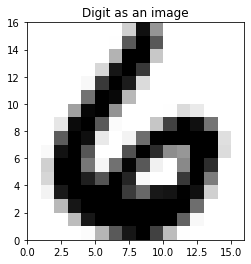

In [5]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape

# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Visualize the i'th digit as an image
plt.subplot(1,1,1);
I = reshape(X[i,:],(16,16))
plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
plt.title('Digit as an image');
plt.show()
#------------------------------------------------

[1. 0. 1. ... 1. 0. 1.]
The plots show the original first 10 images -- 0 or 1's
The figure shows the original image - Digit:1.0


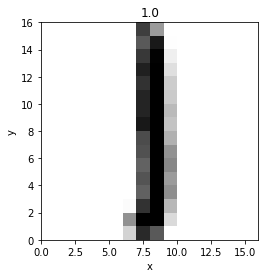

The figure shows the original image - Digit:0.0


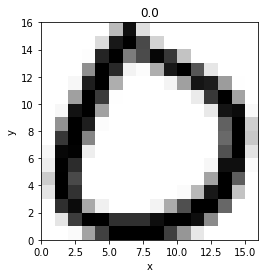

The figure shows the original image - Digit:1.0


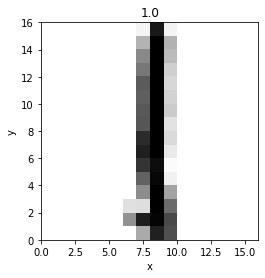

The figure shows the original image - Digit:0.0


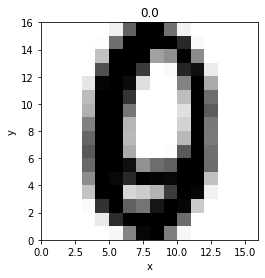

The figure shows the original image - Digit:1.0


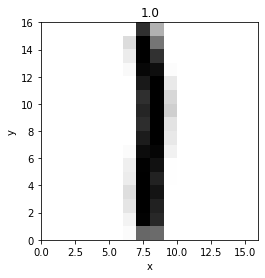

The figure shows the original image - Digit:1.0


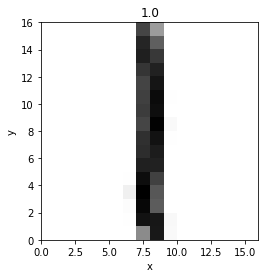

The figure shows the original image - Digit:0.0


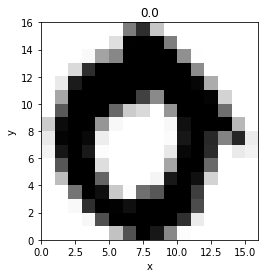

The figure shows the original image - Digit:1.0


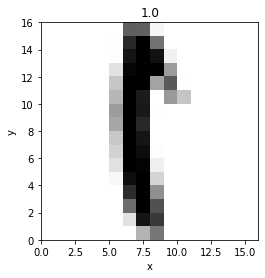

The figure shows the original image - Digit:1.0


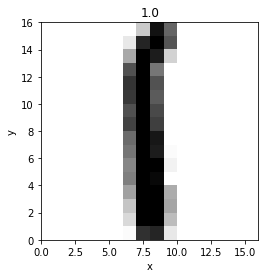

The figure shows the original image - Digit:1.0


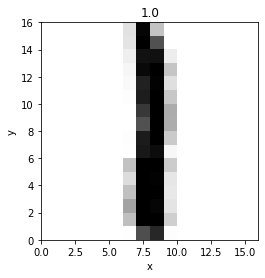

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape

#-------------------------------------------------------------------------------------------------------------------------------
#Load the data
data = scipy.io.loadmat("C:\\Users\\noric\\Downloads\\Assignment_2\\Assignment_2\\Data\\zipdata")
#-------------------------------------------------------------------------------------------------------------------------------

traindata = data['traindata']

X=[]
y=[]

for row in traindata:
    if row[0]==1 or row[0]==0:
        X.append(row)

y = np.array(X)[:,0]        
X = np.array(X)[:,1:]

print(y)
print("The plots show the original first 10 images -- 0 or 1's")
for i in range(0,10):
    # Visualize the i'th digit as an image
    print("The figure shows the original image - Digit:"+ str(y[i]))
    plt.subplot(1,1,1);
    I = reshape(X[i,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title(str(y[i]));
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()




These plots show: On the left - the original image; On the right - the reconstructed counterpart
The two figures shows the original image and the reconstructed counterpart - Digit:1.0


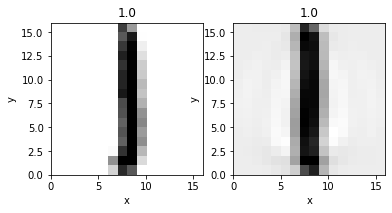

The two figures shows the original image and the reconstructed counterpart - Digit:0.0


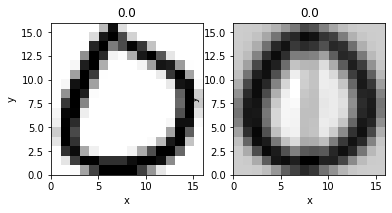

The two figures shows the original image and the reconstructed counterpart - Digit:1.0


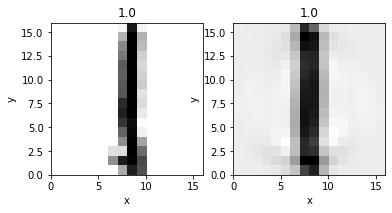

The two figures shows the original image and the reconstructed counterpart - Digit:0.0


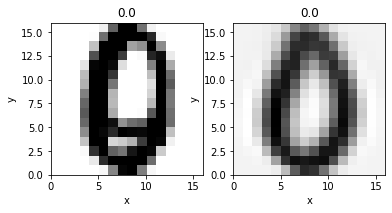

The two figures shows the original image and the reconstructed counterpart - Digit:1.0


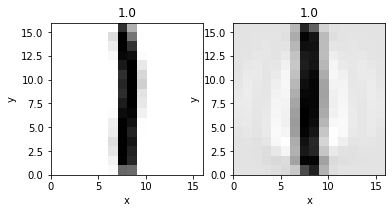

The two figures shows the original image and the reconstructed counterpart - Digit:1.0


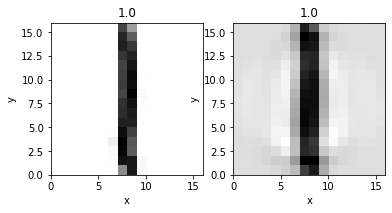

The two figures shows the original image and the reconstructed counterpart - Digit:0.0


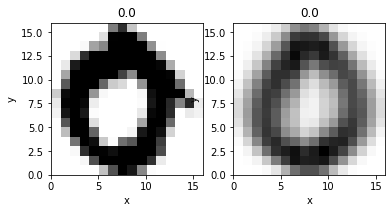

The two figures shows the original image and the reconstructed counterpart - Digit:1.0


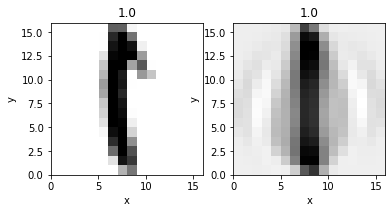

The two figures shows the original image and the reconstructed counterpart - Digit:1.0


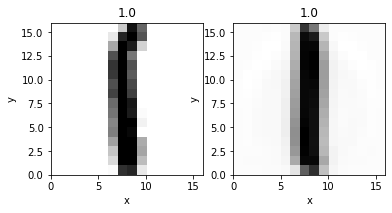

The two figures shows the original image and the reconstructed counterpart - Digit:1.0


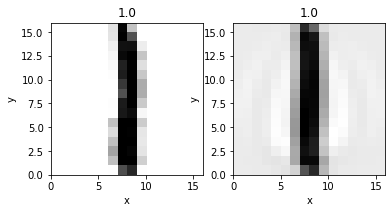

In [19]:
import statistics
import numpy
import matplotlib.pyplot as plt

q=[] 

for el in range(len(X[0])):
    q.append(statistics.mean(X[:,el]))

X_mean_centered=X-np.array(q,dtype=float)
u,s,vh = numpy.linalg.svd(np.array(X_mean_centered,dtype=float))

v = vh.transpose()
Z=np.dot(X_mean_centered,v[:,:4])


W= np.dot(Z,v[:,:4].T) +np.array(q,dtype=float)


#fig, ax = plt.subplots(10,2,figsize=(8,8))
#ax=ax.ravel()

x=0
xx=1

print("These plots show: On the left - the original image; On the right - the reconstructed counterpart")
for i in range(0,10):
    # Visualize the i'th digit as an image
    # Visualize the i'th digit as an image
    fig,ax = plt.subplots(1,2);
    print("The two figures shows the original image and the reconstructed counterpart - Digit:"+ str(y[i]))

    I = reshape(X[i,:],(16,16))
    (ax[0]).imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    (ax[0]).set_title(str(y[i]))
    (ax[0]).set_xlabel('x')
    (ax[0]).set_ylabel('y')
    
   
    I = reshape(W[i,:],(16,16))
    ax[1].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    ax[1].set_title(str(y[i]))
    (ax[1]).set_xlabel('x')
    (ax[1]).set_ylabel('y')
    
  
    plt.show()



The subplots show: The projection of the data on all possible two dimensions
The subplot shows: The projection of the data on PC1 and PC0
The subplot shows: The projection of the data on PC1 and PC1
The subplot shows: The projection of the data on PC1 and PC2
The subplot shows: The projection of the data on PC1 and PC3
The subplot shows: The projection of the data on PC1 and PC0
The subplot shows: The projection of the data on PC1 and PC1
The subplot shows: The projection of the data on PC1 and PC2
The subplot shows: The projection of the data on PC1 and PC3
The subplot shows: The projection of the data on PC1 and PC0
The subplot shows: The projection of the data on PC1 and PC1
The subplot shows: The projection of the data on PC1 and PC2
The subplot shows: The projection of the data on PC1 and PC3
The subplot shows: The projection of the data on PC1 and PC0
The subplot shows: The projection of the data on PC1 and PC1
The subplot shows: The projection of the data on PC1 and PC2
The subp

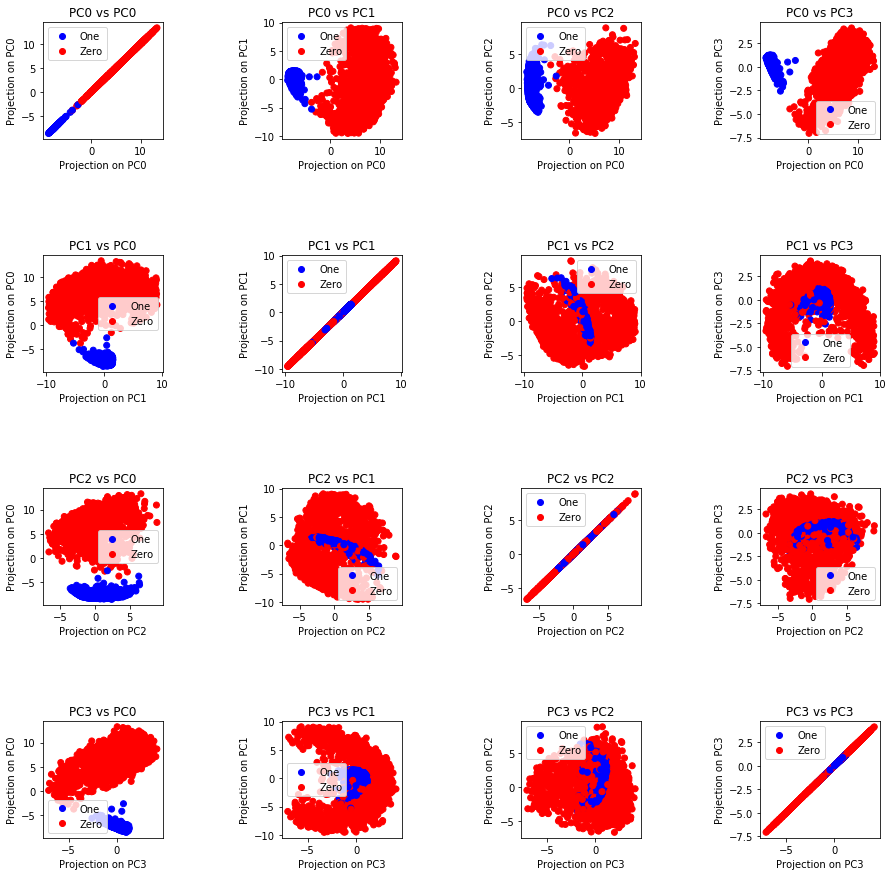

In [21]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


fig, ax = plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)

custom_lines = [Line2D([], [], color='b', marker='o', lw=0),
                Line2D([], [], color='r', marker='o', lw=0)]


colors=[]
for i in range(len(y)):
    if y[i]==1:
        colors.append('b')
    else:
        colors.append('r')
        
print("The subplots show: The projection of the data on all possible two dimensions")
for i in range (0,4):
    for j in range(0,4):
        print("The subplot shows: The projection of the data on PC"+str(1)+" and PC"+str(j))
        ax[i][j].scatter(Z[:,i],Z[:,j],color=colors)
        ax[i][j].legend(custom_lines, ["One", "Zero"])
        ax[i][j].set_xlabel("Projection on PC"+str(i))
        ax[i][j].set_ylabel("Projection on PC"+str(j))
        ax[i][j].set_title("PC"+str(i) +" vs " +"PC"+str(j))
        

The plot shows: The projection of the data on three dimensions -- using the PC's that capture the most variance


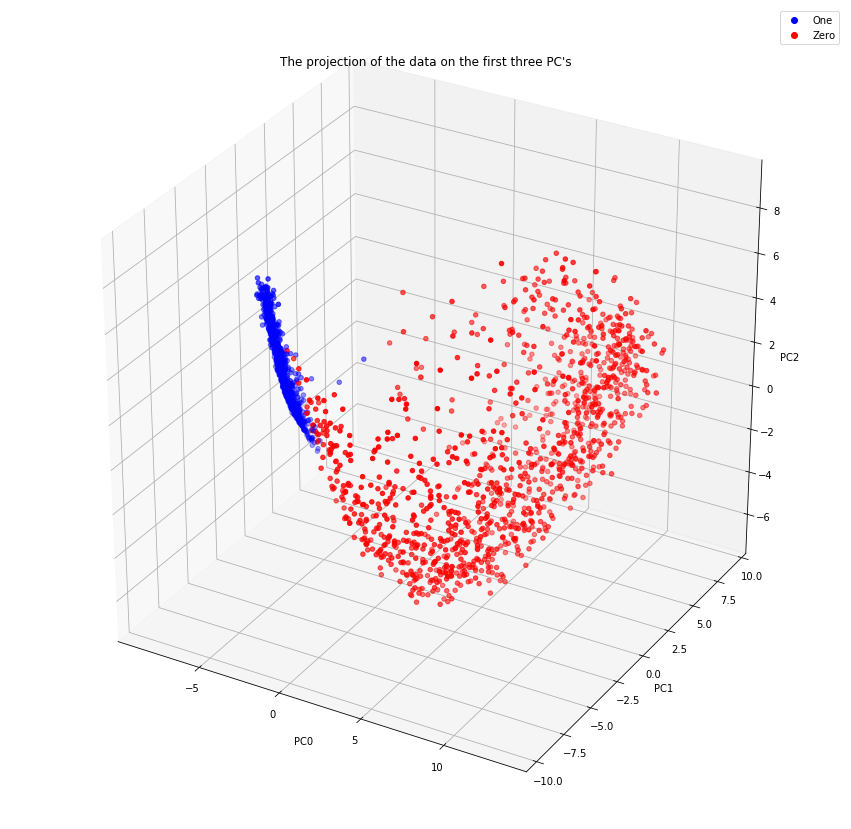

In [71]:
from mpl_toolkits.mplot3d import Axes3D

custom_lines = [Line2D([], [], color='b', marker='o', lw=0),
                Line2D([], [], color='r', marker='o', lw=0)]


colors=[]
for i in range(len(y)):
    if y[i]==1:
        colors.append('b')
    else:
        colors.append('r')
        

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:,0],Z[:,1],Z[:,2], marker='o', color=colors)



print("The plot shows: The projection of the data on three dimensions -- using the PC's that capture the most variance")
ax.set_title("The projection of the data on the first three PC's")
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.legend(custom_lines, ["One", "Zero"])

plt.show()




About the subplots:

I see that the the first four PC's capture the most variance, and they can be used to linearly separate the data. The separation of the data is done successfully if you project the data on the first PC (PC0) in combination with another component. By the projections PC0 on PCy where y = 1..3 I see that the first PC component (PC0) has the strongest influence with respect to how clearly the data is linearly separated. 

The projection on PC0 vs PC3 (and vice versa) (linearly) saparates the data the best. I would choose this projection if I would want to classify the data.

 
I see that projecting the data on a combination on PC's that does not include PC0 does not give me a linearly separatd data. 

-------------------------------------------

About the projection of our data on the first 3 PC's:

The variance of the '1's (red dot's) is much larger compared to the variance of of the '0's (blue dot's). This can also be seen when looking at the first 4 subplots. Furthermore, from the 2-D plots we see that the projection of the data on PC0 x PC2 visually separates the data and this can be seen in the 3-D plot as well. 




## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [4]:
import numpy as np

population = np.array([2,3,6,8,11,18])
m=np.ndarray.mean(population)
std_dev=np.ndarray.std(population)


print("Mean",m)
print("Std",std_dev)

Mean 8.0
Std 5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [5]:
import itertools

samples_2=itertools.combinations(population,2)
#print(list(samples_2))

samples_4=itertools.combinations(population,4)
#print(list(samples_4))

sample2_mean=[]
sample4_mean=[]

for (a,b) in (list(samples_2)):
    mean2=np.ndarray.mean(np.array([a,b]))
    sample2_mean.append(mean2)
    print((a,b),mean2)
    
    
    
for (a,b,c,d) in (list(samples_4)):
    mean4=np.ndarray.mean(np.array([a,b,c,d]))
    sample4_mean.append(mean4)
    print((a,b,c,d), mean4)
    


(2, 3) 2.5
(2, 6) 4.0
(2, 8) 5.0
(2, 11) 6.5
(2, 18) 10.0
(3, 6) 4.5
(3, 8) 5.5
(3, 11) 7.0
(3, 18) 10.5
(6, 8) 7.0
(6, 11) 8.5
(6, 18) 12.0
(8, 11) 9.5
(8, 18) 13.0
(11, 18) 14.5
(2, 3, 6, 8) 4.75
(2, 3, 6, 11) 5.5
(2, 3, 6, 18) 7.25
(2, 3, 8, 11) 6.0
(2, 3, 8, 18) 7.75
(2, 3, 11, 18) 8.5
(2, 6, 8, 11) 6.75
(2, 6, 8, 18) 8.5
(2, 6, 11, 18) 9.25
(2, 8, 11, 18) 9.75
(3, 6, 8, 11) 7.0
(3, 6, 8, 18) 8.75
(3, 6, 11, 18) 9.5
(3, 8, 11, 18) 10.0
(6, 8, 11, 18) 10.75


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [6]:
m2= np.ndarray.mean(np.array(sample2_mean))
m4= np.ndarray.mean(np.array(sample4_mean))
print("Mean of sample means2",m2)
print("Mean of sample means4",m4)


std2= np.ndarray.std(np.array(sample2_mean))
std4= np.ndarray.std(np.array(sample4_mean))
print("Std of sample means2",std2)
print("Std of sample means4",std4)


Mean of sample means2 8.0
Mean of sample means4 8.0
Std of sample means2 3.40587727318528
Std of sample means4 1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

----
The population mean= 8 

The mean of the 2-sample means = 8 

The mean of the 4-sample means = 8 

All means are equal 

---------------------------------


The std_pop/sq(2) =3.8078

The std of 2-sample means =  5.3851/ sq(2) * sq(4/5) = 3.405   (They are approx. the same) 

---------------------------------

The std_pop/sq(4) = 2.6925

The std of 4-sample means = 5.3851/ sq(4) * sq(2/5) = 1.702 (They are approx. the same)


---------------------------------
Therefore the central limit theorem is verified.

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

The first figure shows: The distribution of the population with respect to the number of appendages


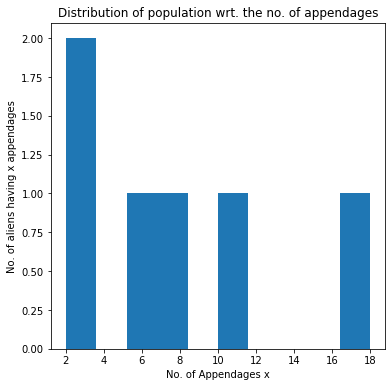

The second figure shows: The distribution of the means of the samples with two aliens with respect to the number of appendages


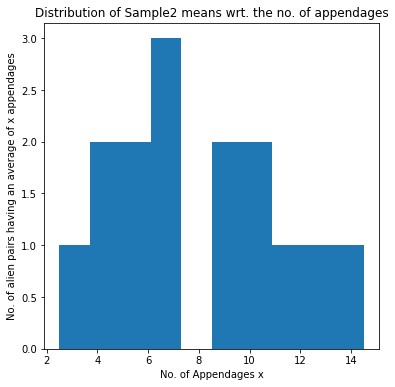

The third figure shows: The distribution of the means of the samples with four aliens with respect to the number of appendages


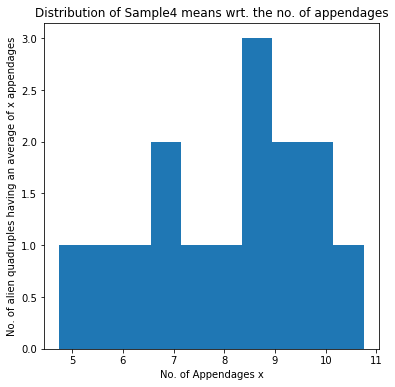

In [26]:
import scipy.io as sio
import statistics
import scipy.stats
import numpy
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1,figsize=(6,6))

print("The first figure shows: The distribution of the population with respect to the number of appendages")
ax.hist(np.array(population))
ax.set_xlabel("No. of Appendages x")
ax.set_ylabel("No. of aliens having x appendages")
ax.set_title("Distribution of population wrt. the no. of appendages")
plt.show()


fig, ax = plt.subplots(1,1,figsize=(6,6))

print("The second figure shows: The distribution of the means of the samples with two aliens with respect to the number of appendages")
ax.hist(np.array(sample2_mean))
ax.set_xlabel("No. of Appendages x")
ax.set_ylabel("No. of alien pairs having an average of x appendages")
ax.set_title("Distribution of Sample2 means wrt. the no. of appendages")
plt.show()


fig, ax = plt.subplots(1,1,figsize=(6,6))

print("The third figure shows: The distribution of the means of the samples with four aliens with respect to the number of appendages")
ax.hist(np.array(sample4_mean))
ax.set_xlabel("No. of Appendages x")
ax.set_ylabel("No. of alien quadruples having an average of x appendages")
ax.set_title("Distribution of Sample4 means wrt. the no. of appendages")
plt.show()


As the sample size increases, the distribution of the sample means approaches a NORMAL distribution (with mean=8 and std_dev= std_dev_pop/sq_root(N))